In [287]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [288]:
%matplotlib inline
import matplotlib
from pylab import *
import numpy as np
from scipy.optimize import curve_fit

pass

In [289]:
# Define some plotting styles that we will use.
fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

## cell plating
### data

In [316]:
OD = np.array([0.165, 0.339, 0.554])

YG_OD02 = np.array([80,81])
YG_OD04 = np.array([107])
YG_OD08 = np.array([162])

PK_OD02 = np.array([40,54])
PK_OD04 = np.array([67,47])
PK_OD08 = np.array([122,104])

TN_OD02 = np.array([44])
TN_OD04 = np.array([68,73])

y1 = np.array([np.mean(YG_OD02), np.mean(YG_OD04), np.mean(YG_OD08)]);
y1_e = np.array([np.std(YG_OD02), np.std(YG_OD04), np.std(YG_OD08)]);

y2 = np.array([np.mean(PK_OD02), np.mean(PK_OD04), np.mean(PK_OD08)]);
y2_e = np.array([np.std(PK_OD02), np.std(PK_OD04), np.std(PK_OD08)]);

y3 = np.array([np.mean(TN_OD02), np.mean(TN_OD04)]);
y3_e = np.array([np.std(TN_OD02), np.std(TN_OD04)]);

### plot

Text(0.5, 1.0, 'CFU/mL as a function of OD600')

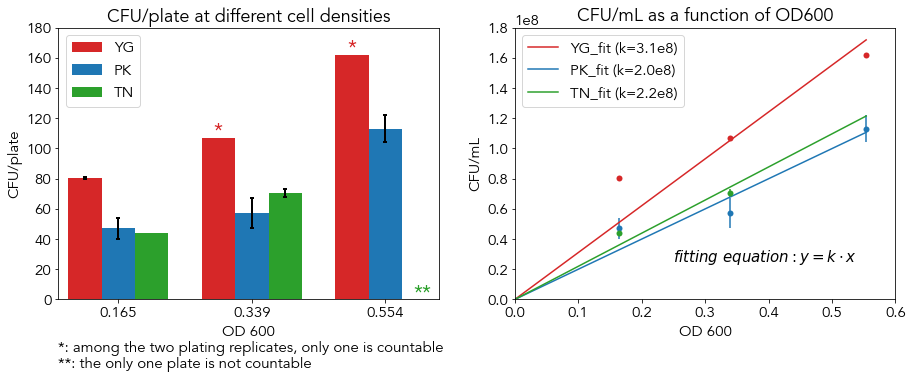

In [317]:
plt.figure(figsize=(15,5))

######################## first figure ########################
subplot(1,2,1)

# set x axis
barWidth = 0.25
r1 = np.arange(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# For YG's data, only show the error bar for OD0.2
plt.bar(r1[1:], y1[1:], color='tab:red', width=barWidth, label='YG')
plt.bar(r1[0], y1[0], yerr=y1_e[:1], color='tab:red', error_kw=dict(lw=2, capsize=2, capthick=2), width=barWidth)

# For PK's data, show all error bars
plt.bar(r2, y2, yerr=y2_e, color='tab:blue', error_kw=dict(lw=2, capsize=2, capthick=2),  width=barWidth, label='PK')

# For TN's data, show the error bar for OD0.4
plt.bar(r3[0], y3[0], color='tab:green', width=barWidth, label='TN')
plt.bar(r3[1], y3[1], yerr=y3_e[1:2], color='tab:green', error_kw=dict(lw=2, capsize=2, capthick=2),  width=barWidth)

# Footnotes
plt.text(r1[1]-0.15*barWidth,y1[1],'*',color='tab:red', fontsize=20)
plt.text(r1[2]-0.15*barWidth,y1[2],'*',color='tab:red', fontsize=20)
plt.text(r3[2]-0.15*barWidth,0,'**',color='tab:green', fontsize=20)

plt.xlabel('OD 600', fontweight='bold')
plt.ylabel('CFU/plate')
plt.xticks([r + barWidth for r in range(len(y1_e))], OD)

plt.ylim((0,180))
plt.xlim((-0.2,2.65))
plt.figtext(0.125, -0.02, "*: among the two plating replicates, only one is countable", ha="left", fontsize=15)
plt.figtext(0.125, -0.065, "**: the only one plate is not countable", ha="left", fontsize=15)
plt.title('CFU/plate at different cell densities',fontsize=18)
plt.legend()

######################## fit (for each person) ########################
subplot(1,2,2)

scaling_factor = 10**6

y1 = scaling_factor*y1
y2 = scaling_factor*y2
y3 = scaling_factor*y3

y1_e = scaling_factor*y1_e
y2_e = scaling_factor*y2_e
y3_e = scaling_factor*y3_e

popt1, pcov1 = curve_fit(linear, OD, y1,p0=1e8)
popt2, pcov2 = curve_fit(linear, OD, y2,p0=1e8)
popt3, pcov3 = curve_fit(linear, OD[:2], y3,p0=1e8)

OD_x = np.array([0,0.165, 0.339, 0.554])

plt.errorbar(OD, y1, yerr=y1_e, fmt='o',color='tab:red')
plt.errorbar(OD, y2, yerr=y2_e, fmt='o',color='tab:blue')
plt.errorbar(OD[:2], y3, yerr=y3_e, fmt='o',color='tab:green')
plt.plot(OD_x, linear(OD_x,*popt1),color='tab:red',label='YG_fit (k='+str(round(popt1[0]/1e8,1))+'e8)')
plt.plot(OD_x, linear(OD_x,*popt2),color='tab:blue',label='PK_fit (k='+str(round(popt2[0]/1e8,1))+'e8)')
plt.plot(OD_x, linear(OD_x,*popt3),color='tab:green',label='TN_fit (k='+str(round(popt3[0]/1e8,1))+'e8)')
plt.legend(ncol=1)

plt.ylim((0,1.8e8))
plt.xlim((0,0.6))
plt.xlabel('OD 600', fontweight='bold')
plt.ylabel('CFU/mL')
plt.text(0.25, 0.251e8, r'$fitting\ equation: y = k\cdot x$')
plt.title('CFU/mL as a function of OD600',fontsize=18)


In [ ]:
### master fit for all

Text(0.5, 1.0, 'CFU/mL as a function of OD600')

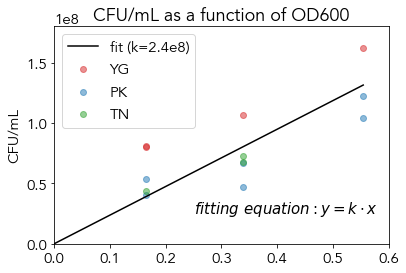

In [328]:
OD_1 = np.repeat(OD[0],5)
CFU_1 = scaling_factor*np.concatenate([YG_OD02,PK_OD02,TN_OD02])
OD_2 = np.repeat(OD[1],5)
CFU_2 = scaling_factor*np.concatenate([YG_OD04,PK_OD04,TN_OD04])
OD_3 = np.repeat(OD[2],3)
CFU_3 = scaling_factor*np.concatenate([YG_OD08,PK_OD08])

OD_all = np.concatenate([OD_1, OD_2, OD_3])
CFU_all = np.concatenate([CFU_1, CFU_2, CFU_3])
popt, pcov = curve_fit(linear, OD_all, CFU_all, p0=1e8)

#################################### plot ####################################

plt.figure(figsize=(6,4))

#fitted line
plt.plot(OD_x, linear(OD_x, *popt),color='black',label='fit (k='+str(round(popt[0]/1e8,1))+'e8)')

#scatter
colors = ['tab:red','tab:blue','tab:green']
labels = ['YG','PK','TN']
k = 0;
for i in (YG_OD02, PK_OD02, TN_OD02):
    plt.scatter(np.repeat(OD[0],len(i)), scaling_factor*i, color=colors[k], alpha = 0.5, label = labels[k]); k += 1;
k = 0;
for i in (YG_OD04, PK_OD04, TN_OD04):
    plt.scatter(np.repeat(OD[1],len(i)), scaling_factor*i, color=colors[k], alpha = 0.5); k += 1;
k = 0;
for i in (YG_OD08, PK_OD08):
    plt.scatter(np.repeat(OD[2],len(i)), scaling_factor*i, color=colors[k], alpha = 0.5); k += 1;

plt.legend()
plt.ylim((0,1.8e8))
plt.xlim((0,0.6))
plt.text(0.25, 0.251e8, r'$fitting\ equation: y = k\cdot x$')
plt.ylabel('CFU/mL')
plt.title('CFU/mL as a function of OD600',fontsize=18)


## phage titering
### data

In [326]:
YG = [117,124,74,107]; 
PK = [119,97,100,111]; 
TN = [111,114];

YG_A = [117,124]
YG_B = [74,107]
PK_A = [119,97]
PK_B = [100,111]


### plot

Text(0.5, 1.0, 'error between dilution series')

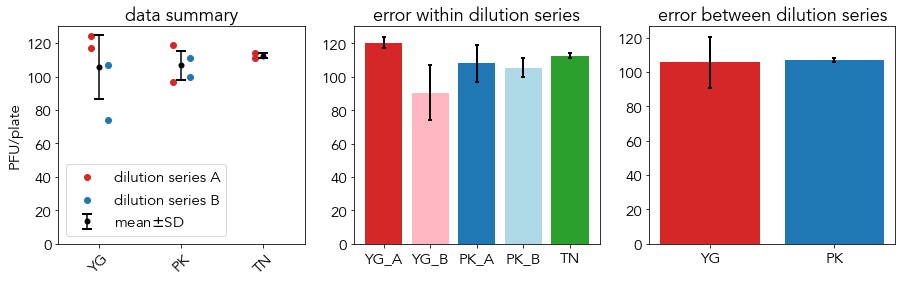

In [327]:
plt.figure(figsize=(15,4))

##################### data summary #####################
subplot(1,3,1)

#mean and SD
k = 0; x_loc = 0.5; 
for i in (YG, PK, TN):
    if k == 0:
        plt.errorbar(x_loc, np.mean(i), yerr = np.std(i), fmt = 'o', capsize=5, capthick=2, color='black',label=r'mean$\pm$SD')
    else: 
        plt.errorbar(x_loc, np.mean(i), yerr = np.std(i), fmt = 'o', capsize=5, capthick=2, color='black')
    x_loc += 1; k += 1;
labels = ['YG', 'PK', 'TN'];
plt.xticks([0.5,1.5,2.5], labels,rotation=45) 

#scatter plot
x_loc2 = [0.4,0.6,1.4,1.6,2.4]
colors = ['tab:red','tab:blue','tab:red','tab:blue','tab:red']
labels = ['dilution series A','dilution series B','dilution series A','dilution series B','dilution series A']
k = 0; 
for i in (YG_A, YG_B,PK_A,PK_B,TN):
    if k < 2:
        plt.scatter(np.array([x_loc2[k],x_loc2[k]]), i, color = colors[k], label=labels[k]); 
    else:
        plt.scatter(np.array([x_loc2[k],x_loc2[k]]), i, color = colors[k]); 
    k += 1; 
plt.legend()

plt.ylabel('PFU/plate')
plt.ylim((0,130))
plt.xlim((0,3))
plt.title('data summary',fontsize=18)

##################### within dilution series #####################
subplot(1,3,2) 

colors = ['tab:red','lightpink','tab:blue','lightblue','tab:green']
labels = ['YG_A','YG_B','PK_A','PK_B','TN']
k = 0;
x = np.arange(5)
for i in (YG_A,YG_B,PK_A,PK_B,TN):
    plt.bar(x[k],np.mean(i),yerr=np.std(i),error_kw=dict(lw=2, capsize=2, capthick=2),color = colors[k], label=labels[k]);
    k += 1;

plt.xticks([r for r in range(5)], labels)
plt.title('error within dilution series',fontsize=18)


##################### between dilution series #####################
subplot(1,3,3) 

YG_between = [np.mean(YG_A),np.mean(YG_B)]
PK_between = [np.mean(PK_A),np.mean(PK_B)]

labels = ['YG','PK']; colors = ['tab:red','tab:blue']

k = 0; 
x = np.arange(2)
for i in (YG_between, PK_between):
    plt.bar(x[k],np.mean(i),yerr=np.std(i),error_kw=dict(lw=2, capsize=2, capthick=2),color = colors[k], label=labels[k]);
    k += 1;

plt.xticks([r for r in range(2)], labels)
plt.title('error between dilution series',fontsize=18)
